In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import plotly.graph_objects as go
import sys

from plotly.subplots import make_subplots
from config import CONFIG

sys.path.insert(1, str(CONFIG.src))
sys.path.insert(3, str(CONFIG.data))
sys.path.insert(2, str(CONFIG.reports))
sys.path.insert(4, str(CONFIG.utils))

from utilities import load_pickle

In [5]:
import pickle

student_history_file_path = CONFIG.data / "visualization" / "student"
student_distiller_history_file_path = CONFIG.data / "visualization" / "student_distill"
teacher_history_file_path = CONFIG.data / "visualization" / "teacherHistory"

student_history = load_pickle(student_history_file_path)
student_distiller_history = load_pickle(student_distiller_history_file_path)
student_distill_history = student_distiller_history
teacher_history = load_pickle(teacher_history_file_path)

## Plotly Accuracy Report

### Using Subplots for comparison

In [56]:

print(f"Current keys for data: \n\t\t- Student: {list(student_distill_history.keys())},\n\t\t- Teacher: {list(teacher_history.keys())}")

Current keys for data: 
		- Student: ['sparse_categorical_accuracy', 'student_loss', 'distillation_loss', 'val_sparse_categorical_accuracy', 'val_student_loss'],
		- Teacher: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


In [92]:
fig = make_subplots(rows=2, cols=2,
        subplot_titles=("Train Accuracy", "Val Accuracy", "Train Loss",), 
        shared_yaxes=True,
        vertical_spacing=0.3)

epochs = list(range(1, len(student_distill_history["sparse_categorical_accuracy"]) + 1))

fig.add_trace(
    go.Scatter(x=epochs, #x axis
                y=student_distill_history["sparse_categorical_accuracy"], #y axis
                name="distilled student accuracy",
                legendgroup = "1"),
                row=1, #plot location
                col=1, #plot location
    )
fig.update_xaxes(title="Hello", row=1, col=1)

fig.add_trace(
    go.Scatter(
        x=epochs,
        y=teacher_history["sparse_categorical_accuracy"],
        name="teacher accuracy",
        legendgroup ="1"
        ),
        row=1,
        col=1,
    )



fig.add_trace(
    go.Scatter(
        x=epochs,
        y=student_distill_history["student_loss"],
        name="distilled student loss",
        legendgroup="2"
    ),
    row=2,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=epochs,
        y=teacher_history["loss"],
        name="teacher loss",
        legendgroup="2"
    ),
    row=2,
    col=1,
)

fig.add_trace(
    go.Scatter(
        y=student_distill_history["val_sparse_categorical_accuracy"],
        x=epochs,
        name="distilled student val accuracy",
        legendgroup="3"
    ),
    row=1,
    col=2
)

fig.add_trace(
    go.Scatter(
        y=teacher_history["val_sparse_categorical_accuracy"],
        x=epochs,
        name="teacher val accuracy",
        legendgroup="3"
    ),
    row=1,
    col=2
)

fig.add_trace(
    go.Scatter(
        y=student_distill_history["val_student_loss"],
        x=epochs,
        name="distilled student val loss",
        legendgroup="4"
    ),
    row=2,
    col=2
)

fig.add_trace(
    go.Scatter(
        y=teacher_history["val_loss"],
        x=epochs,
        name="teacher val loss",
        legendgroup="4"
    ),
    row=2,
    col=2
)

fig.update_layout(height=400, width=600, #adjusting size of the whole plot
                title_text="Performance Report",
                legend_tracegroupgap = 30,
                xaxis1_title="Epochs",
                xaxis2_title="Epochs",
                xaxis3_title="Epochs",
                )

fig.show()

In [90]:
student_distiller_history

{'sparse_categorical_accuracy': [0.8998233675956726,
  0.9644269943237305,
  0.9748501181602478],
 'student_loss': [0.000584360386710614,
  0.00027997372671961784,
  0.004484845791012049],
 'distillation_loss': [0.036148957908153534,
  0.02980130910873413,
  0.011205353774130344],
 'val_sparse_categorical_accuracy': [0.9562143087387085,
  0.967678427696228,
  0.9719206094741821],
 'val_student_loss': [0.015797697007656097,
  0.0018304531695321202,
  0.0015024483436718583]}

## Matplotlib Subplots

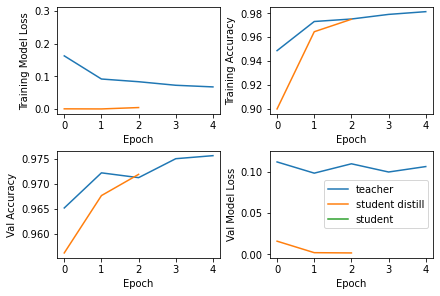

In [88]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True)
ax1.plot(teacher_history["loss"], label="teacher")
ax1.plot(student_distiller_history["student_loss"], label="student distill")
ax1.plot(student_history["loss"], label="student")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Training Model Loss")
# ax2.legend(["teacher", "student distilled", "student"], loc="upper left")
ax2.plot(teacher_history["sparse_categorical_accuracy"])
ax2.plot(student_distiller_history["sparse_categorical_accuracy"])
ax2.plot(student_history["sparse_categorical_accuracy"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Training Accuracy")
ax4.plot(teacher_history["val_loss"], label="teacher")
ax4.plot(student_distiller_history["val_student_loss"], label="student distill")
ax4.plot(student_history["val_loss"], label="student")
ax4.set_xlabel("Epoch")
ax4.set_ylabel("Val Model Loss")
ax3.plot(teacher_history["val_sparse_categorical_accuracy"], label="teacher")
ax3.plot(student_distiller_history["val_sparse_categorical_accuracy"], label="student distill")
ax3.plot(student_history["val_sparse_categorical_accuracy"], label="student")
ax3.set_xlabel("Epoch")
ax3.set_ylabel("Val Accuracy")
plt.legend()

### Seaborn plot

In [6]:
epochs = list(range(1, len(student_distill_history["sparse_categorical_accuracy"]) + 1))

In [11]:
teacher_history["sparse_categorical_accuracy"]
# epochs

[0.9486057162284851,
 0.9729843735694885,
 0.9750739932060242,
 0.9789298176765442,
 0.9812184572219849]

In [13]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<AxesSubplot:>

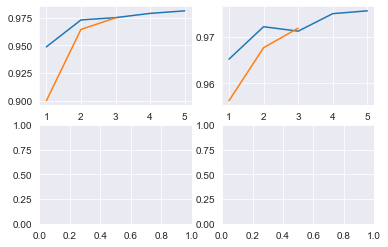

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(2, 2)
sns.set_style("darkgrid")
sns.lineplot(x=[1,2,3,4,5], y=teacher_history["sparse_categorical_accuracy"], ax=axes[0][0])
sns.lineplot(x=epochs, y=student_distill_history["sparse_categorical_accuracy"], ax=axes[0][0])
sns.lineplot(x=[1,2,3,4,5], y=teacher_history["val_sparse_categorical_accuracy"], ax=axes[0][1])
sns.lineplot(x=epochs, y=student_distill_history["val_sparse_categorical_accuracy"], ax=axes[0][1])

## Comparision

1. Matplotlib is really handy and easy to use
2. Plotly is more verbose but looks nicer